Analysis of text
===

Our objective is to load a long text file and count the occurrences of words in that text file. The subtasks of this problem are applicable to many textual analysis tasks.

Text to be analyzed: _"A Study in Scarlet"_ by Arthur Conan Doyle (http://www.gutenberg.org/files/244/244-0.txt)

Load the text file to a string
---

In [1]:
raw_text <- readLines("http://www.gutenberg.org/files/244/244-0.txt")

The `readLines()` function generates a vector of strings. Combine them into a single string:

In [2]:
raw_text <- paste(raw_text, collapse = " ")

Check the result by looking at the first 2000 characters.

In [3]:
substr(raw_text,1,2000)

[1] "The Project Gutenberg EBook of A Study In Scarlet, by Arthur Conan Doyle  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org   Title: A Study In Scarlet  Author: Arthur Conan Doyle  Posting Date: July 12, 2008 [EBook #244] Release Date: April, 1995 Last Updated: September 30, 2016  Language: English  Character set encoding: UTF-8  *** START OF THIS PROJECT GUTENBERG EBOOK A STUDY IN SCARLET ***     Produced by Roger Squires      A STUDY IN SCARLET.  By A. Conan Doyle  [1]         Original Transcriber’s Note: This etext is prepared directly      from an 1887 edition, and care has been taken to duplicate the      original exactly, including typographical and punctuation      vagaries.       Additions to the text include adding the underscore character to      indicate italics, and textual end-notes in square braces.       Project Gutenberg Editor’s Note: In reproofing and moving old PG      files such as this to the present PG directory system it is the      policy to reformat the text to conform to present PG Standards.      In this case however, in consideration of the note above of the      original transcriber describing his care to try to duplicate the      original 1887 edition as to typography and punctuation vagaries,      no changes have been made in this ascii text file. However, in      the Latin-1 file and this html file, present standards are      followed and the several French and Spanish words have been      given their proper accents.  \t Part II, The Country of the Saints, deals much with the Mormon Church.     A STUDY IN SCARLET.      PART I.  (_Being a reprint from the reminiscences of_ JOHN H. WATSON, M.D., _late of the Army Medical Department._) [2]     CHAPTER I. MR. SHERLOCK HOLMES.   IN the year 1878 I took my degree of Doctor of Medicine of the Univ"

Prepare for analysis
----
In order to count the words correctly, we need to remove the punctuation signs and convert all characters to lowercase.

The `gsub()` function is used to find complex patterns and replace them with desired strings. For the task of removing punctuation, we use the _character class_ `[[:punct:]]` and replace all occurrences with an empty string.

In [4]:
cleaned_text <- gsub("[[:punct:]]", "", raw_text)

Check the results:

In [5]:
substr(cleaned_text,1,2000)

[1] "The Project Gutenberg EBook of A Study In Scarlet by Arthur Conan Doyle  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever  You may copy it give it away or reuse it under the terms of the Project Gutenberg License included with this eBook or online at wwwgutenbergorg   Title A Study In Scarlet  Author Arthur Conan Doyle  Posting Date July 12 2008 EBook 244 Release Date April 1995 Last Updated September 30 2016  Language English  Character set encoding UTF8   START OF THIS PROJECT GUTENBERG EBOOK A STUDY IN SCARLET      Produced by Roger Squires      A STUDY IN SCARLET  By A Conan Doyle  1         Original Transcribers Note This etext is prepared directly      from an 1887 edition and care has been taken to duplicate the      original exactly including typographical and punctuation      vagaries       Additions to the text include adding the underscore character to      indicate italics and textual endnotes in square braces       Project Gutenberg Editors Note In reproofing and moving old PG      files such as this to the present PG directory system it is the      policy to reformat the text to conform to present PG Standards      In this case however in consideration of the note above of the      original transcriber describing his care to try to duplicate the      original 1887 edition as to typography and punctuation vagaries      no changes have been made in this ascii text file However in      the Latin1 file and this html file present standards are      followed and the several French and Spanish words have been      given their proper accents  \t Part II The Country of the Saints deals much with the Mormon Church     A STUDY IN SCARLET      PART I  Being a reprint from the reminiscences of JOHN H WATSON MD late of the Army Medical Department 2     CHAPTER I MR SHERLOCK HOLMES   IN the year 1878 I took my degree of Doctor of Medicine of the University of London and proceeded to Netley to go through the course pres"

Convert all characters to lowercase with `tolower()`:

In [6]:
cleaned_text <- tolower(cleaned_text)

Check the results:

In [7]:
substr(cleaned_text,0,2000)

[1] "the project gutenberg ebook of a study in scarlet by arthur conan doyle  this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever  you may copy it give it away or reuse it under the terms of the project gutenberg license included with this ebook or online at wwwgutenbergorg   title a study in scarlet  author arthur conan doyle  posting date july 12 2008 ebook 244 release date april 1995 last updated september 30 2016  language english  character set encoding utf8   start of this project gutenberg ebook a study in scarlet      produced by roger squires      a study in scarlet  by a conan doyle  1         original transcribers note this etext is prepared directly      from an 1887 edition and care has been taken to duplicate the      original exactly including typographical and punctuation      vagaries       additions to the text include adding the underscore character to      indicate italics and textual endnotes in square braces       project gutenberg editors note in reproofing and moving old pg      files such as this to the present pg directory system it is the      policy to reformat the text to conform to present pg standards      in this case however in consideration of the note above of the      original transcriber describing his care to try to duplicate the      original 1887 edition as to typography and punctuation vagaries      no changes have been made in this ascii text file however in      the latin1 file and this html file present standards are      followed and the several french and spanish words have been      given their proper accents  \t part ii the country of the saints deals much with the mormon church     a study in scarlet      part i  being a reprint from the reminiscences of john h watson md late of the army medical department 2     chapter i mr sherlock holmes   in the year 1878 i took my degree of doctor of medicine of the university of london and proceeded to netley to go through the course pres"

Get word counts
---
In order to count the occurrence of words we need to break the string at spaces. We can do this with the `strsplit()` function. Let's try this on the first 1000 characters.

In [8]:
strsplit(substr(cleaned_text,0,1000),split=" ")

[[1]]
  [1] "the"             "project"         "gutenberg"       "ebook"          
  [5] "of"              "a"               "study"           "in"             
  [9] "scarlet"         "by"              "arthur"          "conan"          
 [13] "doyle"           ""                "this"            "ebook"          
 [17] "is"              "for"             "the"             "use"            
 [21] "of"              "anyone"          "anywhere"        "at"             
 [25] "no"              "cost"            "and"             "with"           
 [29] "almost"          "no"              "restrictions"    "whatsoever"     
 [33] ""                "you"             "may"             "copy"           
 [37] "it"              "give"            "it"              "away"           
 [41] "or"              "reuse"           "it"              "under"          
 [45] "the"             "terms"           "of"              "the"            
 [49] "project"         "gutenberg"       "license"         "included"       
 [53] "with"            "this"            "ebook"           "or"             
 [57] "online"          "at"              "wwwgutenbergorg" ""               
 [61] ""                "title"           "a"               "study"          
 [65] "in"              "scarlet"         ""                "author"         
 [69] "arthur"          "conan"           "doyle"           ""               
 [73] "posting"         "date"            "july"            "12"             
 [77] "2008"            "ebook"           "244"             "release"        
 [81] "date"            "april"           "1995"            "last"           
 [85] "updated"         "september"       "30"              "2016"           
 [89] ""                "language"        "english"         ""               
 [93] "character"       "set"             "encoding"        "utf8"           
 [97] ""                ""                "start"           "of"             
[101] "this"            "project"         "gutenberg"       "ebook"          
[105] "a"               "study"           "in"              "scarlet"        
[109] ""                ""                ""                ""               
[113] ""                "produced"        "by"              "roger"          
[117] "squires"         ""                ""                ""               
[121] ""                ""                "a"               "study"          
[125] "in"              "scarlet"         ""                "by"             
[129] "a"               "conan"           "doyle"           ""               
[133] "1"               ""                ""                ""               
[137] ""                ""                ""                ""               
[141] ""                "original"        "transcribers"    "note"           
[145] "this"            "etext"           "is"              "prepared"       
[149] "directly"        ""                ""                ""               
[153] ""                ""                "from"            "an"             
[157] "1887"            "edition"         "and"             "care"           
[161] "has"             "been"            "taken"           "to"             
[165] "duplicate"       "the"             ""                ""               
[169] ""                ""                ""                "original"       
[173] "exactly"         "including"       "typographical"   "and"            
[177] "punctuation"     ""                ""                ""               
[181] ""                ""                "vagaries"        ""               
[185] ""                ""                ""                ""               
[189] ""                "additions"       "to"              "the"            
[193] "text"            "include"         "adding"          "the"            
[197] "underscore"      "character"       "to"              ""               
[201] ""                ""                ""                ""               
[205] "indicate"

The result contains some empty strings because in the text we have some words separated by two or more blanks. This is not a big issue for our purposes (the count of empty strings can be disregarded). But if we want to avoid this, we can just use the following:

In [9]:
strsplit(substr(cleaned_text,0,1000),split=" +")

[[1]]
  [1] "the"             "project"         "gutenberg"       "ebook"          
  [5] "of"              "a"               "study"           "in"             
  [9] "scarlet"         "by"              "arthur"          "conan"          
 [13] "doyle"           "this"            "ebook"           "is"             
 [17] "for"             "the"             "use"             "of"             
 [21] "anyone"          "anywhere"        "at"              "no"             
 [25] "cost"            "and"             "with"            "almost"         
 [29] "no"              "restrictions"    "whatsoever"      "you"            
 [33] "may"             "copy"            "it"              "give"           
 [37] "it"              "away"            "or"              "reuse"          
 [41] "it"              "under"           "the"             "terms"          
 [45] "of"              "the"             "project"         "gutenberg"      
 [49] "license"         "included"        "with"            "this"           
 [53] "ebook"           "or"              "online"          "at"             
 [57] "wwwgutenbergorg" "title"           "a"               "study"          
 [61] "in"              "scarlet"         "author"          "arthur"         
 [65] "conan"           "doyle"           "posting"         "date"           
 [69] "july"            "12"              "2008"            "ebook"          
 [73] "244"             "release"         "date"            "april"          
 [77] "1995"            "last"            "updated"         "september"      
 [81] "30"              "2016"            "language"        "english"        
 [85] "character"       "set"             "encoding"        "utf8"           
 [89] "start"           "of"              "this"            "project"        
 [93] "gutenberg"       "ebook"           "a"               "study"          
 [97] "in"              "scarlet"         "produced"        "by"             
[101] "roger"           "squires"         "a"               "study"          
[105] "in"              "scarlet"         "by"              "a"              
[109] "conan"           "doyle"           "1"               "original"       
[113] "transcribers"    "note"            "this"            "etext"          
[117] "is"              "prepared"        "directly"        "from"           
[121] "an"              "1887"            "edition"         "and"            
[125] "care"            "has"             "been"            "taken"          
[129] "to"              "duplicate"       "the"             "original"       
[133] "exactly"         "including"       "typographical"   "and"            
[137] "punctuation"     "vagaries"        "additions"       "to"             
[141] "the"             "text"            "include"         "adding"         
[145] "the"             "underscore"      "character"       "to"             
[149] "indicate"        "italics"         "and"             "textual"        
[153] "endnotes"        "in"              "square"          "braces"         
[157] "project"

Now we don't have the empty strings. The plus sign means "one or more of the preceding character" in the _regular expressions_ language.

`strsplit()` returns a list (of length one, in this case), so we take the first element of the list.

In [10]:
word_vec <- strsplit(cleaned_text, split=" +")[[1]]

In [11]:
options(jupyter.rich_display = FALSE)

In [12]:
word_vec[1:10]

 [1] "the"       "project"   "gutenberg" "ebook"     "of"        "a"        
 [7] "study"     "in"        "scarlet"   "by"       

Now we count the occurrence of each word. We have already done this in Lecture 7, so we just copy the code.

In [13]:
wordcounts <- list()
for (word in word_vec){
    if (is.null(wordcounts[[word]])){
        wordcounts[[word]] <- 1
    } else {
        wordcounts[[word]] <- wordcounts[[word]] + 1
    }
}


In [14]:
wordcounts[1:10]

$the
[1] 2742

$project
[1] 88

$gutenberg
[1] 30

$ebook
[1] 10

$of
[1] 1334

$a
[1] 1061

$study
[1] 17

$`in`
[1] 805

$scarlet
[1] 10

$by
[1] 181


Let's get the words in order, most frequent ones first.

In [15]:
dec_order <- order(unlist(wordcounts),decreasing = T)
top20 <- wordcounts[dec_order][1:20] # 20 most frequent words
top20

$the
[1] 2742

$and
[1] 1429

$of
[1] 1334

$to
[1] 1172

$a
[1] 1061

$i
[1] 898

$`in`
[1] 805

$he
[1] 800

$that
[1] 667

$his
[1] 654

$was
[1] 651

$it
[1] 596

$you
[1] 515

$had
[1] 476

$with
[1] 391

$as
[1] 348

$`for`
[1] 338

$at
[1] 337

$is
[1] 332

$which
[1] 323


Visualization
----
Let's plot the occurrences of the most frequent 20 words in a bar plot.

In [16]:
unlist(top20)

  the   and    of    to     a     i    in    he  that   his   was    it   you 
 2742  1429  1334  1172  1061   898   805   800   667   654   651   596   515 
  had  with    as   for    at    is which 
  476   391   348   338   337   332   323 

In [17]:
options(repr.plot.width=10, repr.plot.height=4)

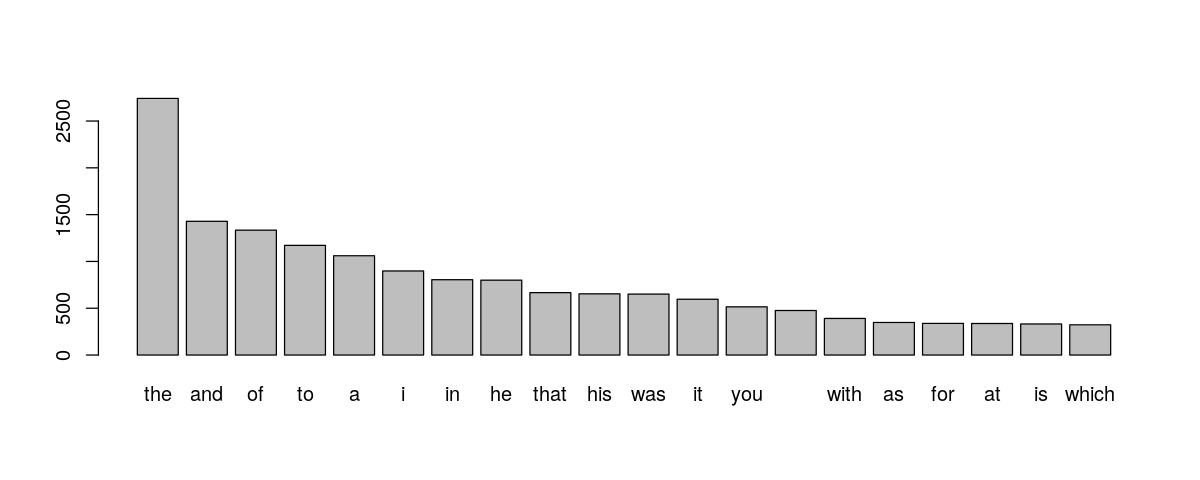

In [18]:
barplot(unlist(top20))

Random numbers and simulations
===

Uniformly distributed random numbers are generated with `runif(n, min, max)`. Default parameters are n=1, min=0, max=1.

In [19]:
runif(20,-1,1) # 20 random numbers uniformly distributed between -1 and 1.

 [1]  0.90600872 -0.90080588  0.09875194 -0.87774382  0.50557069  0.88650196
 [7]  0.70922089  0.61441052 -0.31275730 -0.40665168 -0.50406409  0.12464491
[13]  0.31516810  0.41159052 -0.99136359 -0.73102392  0.52411795 -0.78736732
[19] -0.54704478  0.08695084

Another common distribution is the _Normal_ or _Gaussian_ distribution (a.k.a. the _bell curve_). Normally distributed random numbers are generated with the `rnorm(n,mean,sd)` function. Default parameter values are n=1, mean=0, sd=1.

In [20]:
rnorm(20)

 [1]  0.066559728 -0.932922292 -0.444911281 -0.298159621  0.347267390
 [6] -0.006272712 -0.604887574 -1.482248267 -0.489176525  1.259109422
[11] -0.258156943 -0.320558141 -1.021534337 -1.796997112 -0.599952910
[16] -0.105592352  0.397594423  1.164741129 -1.086422046  1.137768507

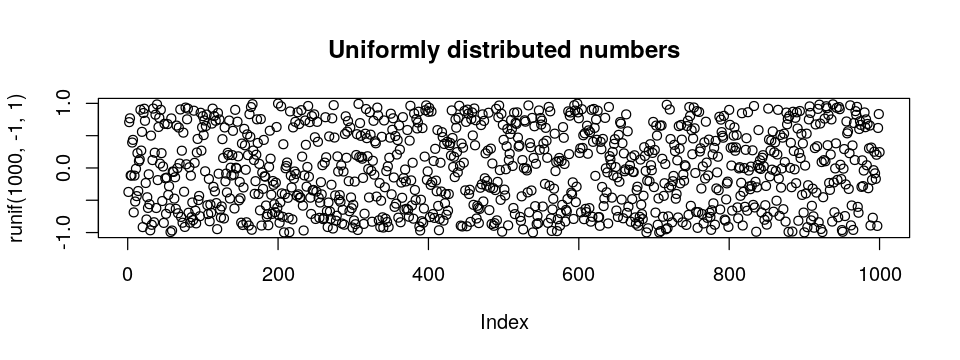

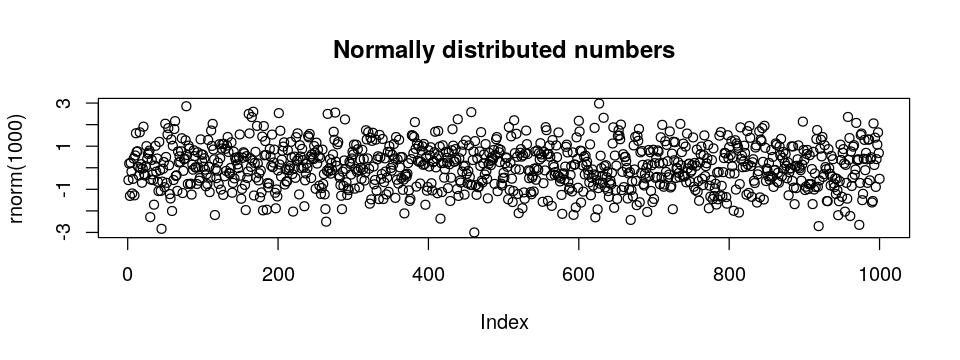

In [21]:
options(repr.plot.width=8, repr.plot.height=3)
plot(runif(1000,-1,1))
title("Uniformly distributed numbers")
plot(rnorm(1000))
title("Normally distributed numbers")

Plot the histograms of the random samples.

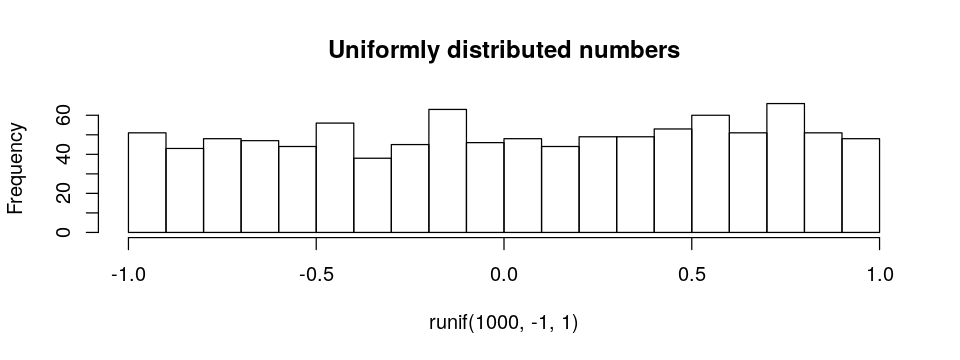

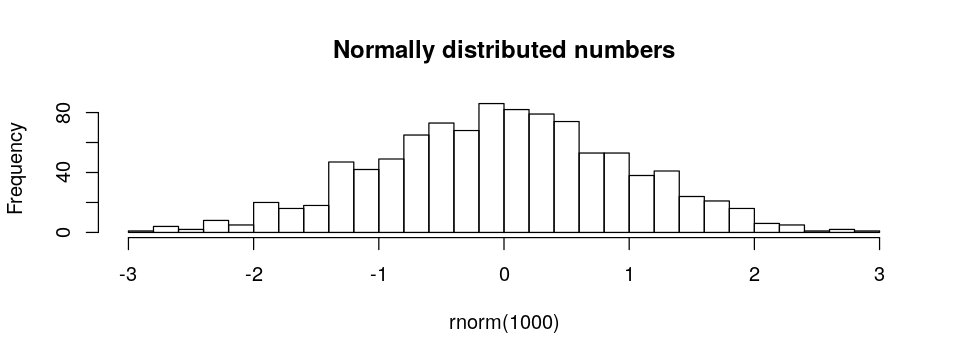

In [22]:
options(repr.plot.width=8, repr.plot.height=3)
hist(runif(1000,-1,1), breaks=25, main="Uniformly distributed numbers")
hist(rnorm(1000), breaks=25,main="Normally distributed numbers")

Note that the distributions do not look perfect. The reason is that our random sample is finite. As we draw more and more samples, the histogram will approach the theoretical distribution.

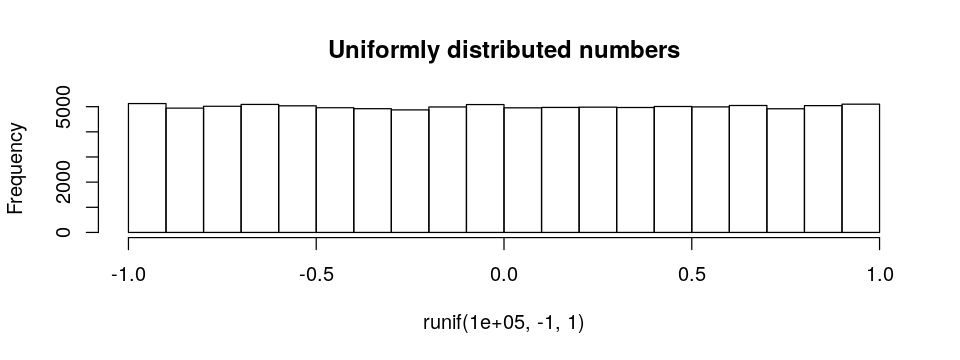

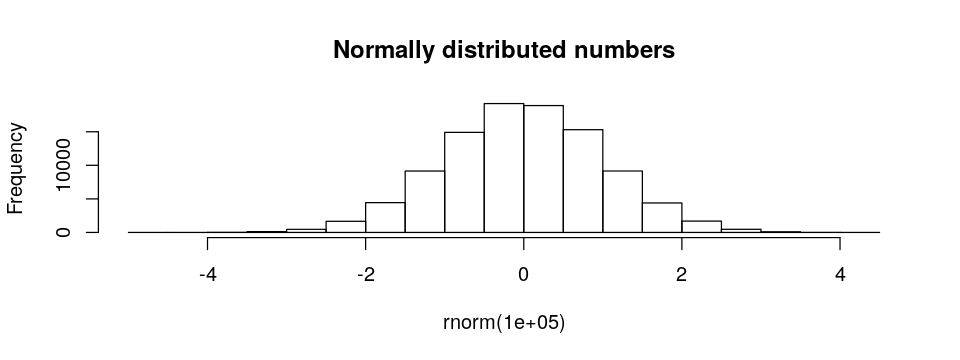

In [23]:
options(repr.plot.width=8, repr.plot.height=3)
hist(runif(100000,-1,1), breaks=25, main="Uniformly distributed numbers")
hist(rnorm(100000), breaks=25,main="Normally distributed numbers")

Getting the same random sequence
---
In some cases we want to get the same random sequence in every simulation, so that we can identify and correct errors. For that, we can set the _seed_ of the random number generator to a fixed number.

In [24]:
set.seed(123)
runif(10,-1,1)
set.seed(123)
runif(10,-1,1)

 [1] -0.42484496  0.57661027 -0.18204616  0.76603481  0.88093457 -0.90888700
 [7]  0.05621098  0.78483809  0.10287003 -0.08677053

 [1] -0.42484496  0.57661027 -0.18204616  0.76603481  0.88093457 -0.90888700
 [7]  0.05621098  0.78483809  0.10287003 -0.08677053

Coin toss experiment
---

In [25]:
sample(c("H","T"),10,replace = TRUE)

 [1] "T" "H" "T" "T" "H" "T" "H" "H" "H" "T"

We throw a coin 10 times. How many heads to we get on average?

The number of heads in one experiment (10 throws):

In [26]:
sum(sample(c("H","T"),10,replace = TRUE)=="H")

[1] 2

This number changes every time due to the randomness:

In [27]:
sum(sample(c("H","T"),10,replace = TRUE)=="H")

[1] 5

We repeat the experiment many times and get the average:

In [28]:
nexperiments <- 10000
total <- 0
for (i in 1:nexperiments){
    total <- total + sum(sample(c("H","T"),10,replace = TRUE)=="H")
}
total/nexperiments

[1] 5.0263

We throw a coin 10 times. What is the probability that we get exactly 7 heads?
Again, we make many experiments (10 coin tosses), and when we get 7 heads, we register this as "success". Then we return the ratio of successes to trials.

In [29]:
120/1024

[1] 0.1171875

In [30]:
nexperiments <- 10000
successes <- 0
for (i in 1:nexperiments){
    heads <- sum(sample(c("H","T"),10,replace = TRUE)=="H")
    if(heads==7) successes <- successes + 1
}
successes/nexperiments

[1] 0.1133

The correct answer is 120/1024 = 0.1172, which is close.

Throwing dice
---

In [31]:
d1 <- sample(1:6, 10, replace=TRUE)
d2 <- sample(1:6, 10, replace=TRUE)
d1
d2

 [1] 5 3 6 4 2 5 4 4 2 5

 [1] 1 6 5 3 1 3 5 5 2 2

If we throw two dice, what is the probability of getting a total of 2?

In [32]:
nexperiments <- 10000
successes <- 0
for (i in 1:nexperiments){
    d1 <- sample(1:6,1)
    d2 <- sample(1:6,1)
    if (d1 + d2 == 2){
        successes <- successes + 1
    }
}
successes/nexperiments

[1] 0.0286

Estimating pi
---

Suppose we generate random numbers pairs $(x,y)$ within the square $-1\leq x\leq 1$ and $-1\leq y\leq 1$. Some of them fall inside the inscribed circle $x^2 + y^2 \leq 1$. The area of the circle is $\pi$ and the area of the square is 4, so the ratio of the points that fall inside the circle to all points inside the square gives an estimate of $\pi/4$.

In [33]:
x <- runif(100,-1,1)
y <- runif(100,-1,1)

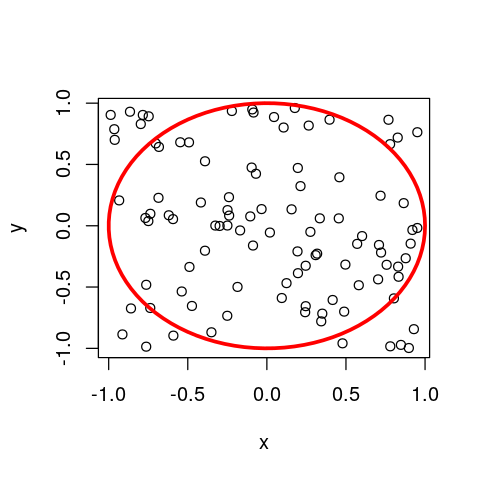

In [34]:
options(repr.plot.width=4, repr.plot.height=4)
plot(x,y)
t <- seq(0,2*pi,length.out=100)
xx <- cos(t)
yy <- sin(t)
lines(xx,yy,lwd = 3,col="red")

Let's estimate pi with this run:

In [35]:
4*sum(x^2 + y^2 < 1)/length(x)

[1] 3.2

With a new set of random hits, the estimate will differ:

In [36]:
x <- runif(100,-1,1)
y <- runif(100,-1,1)
4*sum(x^2 + y^2 < 1)/length(x)

[1] 3.04

we can repeat this experiment many times, and see the distribution of estimates.

In [37]:
pi_est <- c()
for (i in 1:100){
    x <- runif(100,-1,1)
    y <- runif(100,-1,1)
    pi_est <- c(pi_est, 4*sum(x^2 + y^2 < 1)/length(x))
}

In [38]:
pi_est

  [1] 3.40 3.28 3.40 3.44 3.32 3.20 3.12 3.08 3.36 3.28 3.04 3.24 3.16 2.96 3.12
 [16] 3.48 3.04 3.28 3.04 3.36 3.20 3.20 3.16 3.08 3.04 3.00 3.20 3.20 3.00 3.32
 [31] 3.20 3.32 3.20 3.04 3.12 3.24 3.48 3.24 2.84 3.24 3.24 3.44 3.36 3.08 3.56
 [46] 3.04 3.04 3.12 3.16 3.00 2.92 3.12 3.08 3.20 3.20 2.80 3.28 3.08 3.24 2.96
 [61] 3.04 3.16 3.04 3.16 3.12 3.32 3.12 3.08 2.88 3.08 3.00 3.28 3.32 3.16 3.36
 [76] 3.40 3.28 2.68 3.20 2.92 2.88 3.20 3.28 3.12 3.16 3.36 3.04 3.04 3.16 3.20
 [91] 2.96 3.12 3.20 3.12 3.16 3.32 3.00 3.04 3.12 3.12

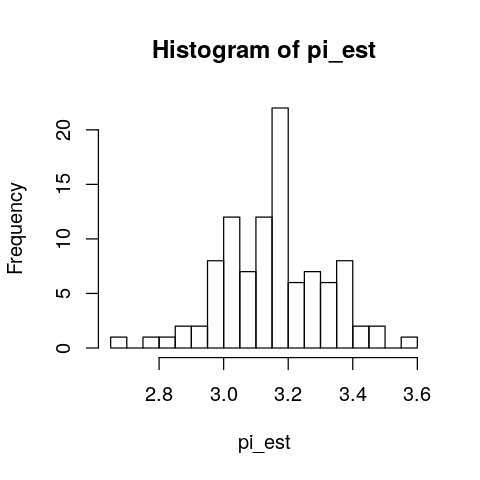

In [39]:
hist(pi_est,breaks=20)

In [40]:
mean(pi_est)
median(pi_est)
sd(pi_est)

[1] 3.1604

[1] 3.16

[1] 0.1565791

In [41]:
pi_est <- c()
for (i in 1:10000){
    x <- runif(100,-1,1)
    y <- runif(100,-1,1)
    pi_est <- c(pi_est, 4*sum(x^2 + y^2 < 1)/length(x))
}

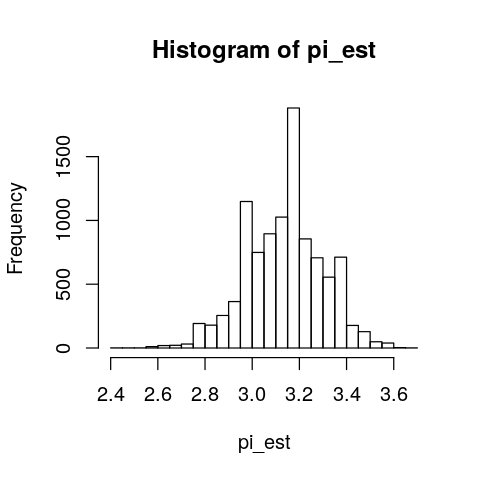

In [42]:
hist(pi_est,breaks=20)

In [43]:
mean(pi_est)
median(pi_est)
sd(pi_est)

[1] 3.142312

[1] 3.16

[1] 0.162916

Now use a larger sample for estimating pi.

In [44]:
nsample <- 1000
nexperiments <- 10000
pi_est <- c()
for (i in 1:nexperiments){
    x <- runif(nsample,-1,1)
    y <- runif(nsample,-1,1)
    pi_est <- c(pi_est, 4*sum(x^2 + y^2 < 1)/nsample)
}

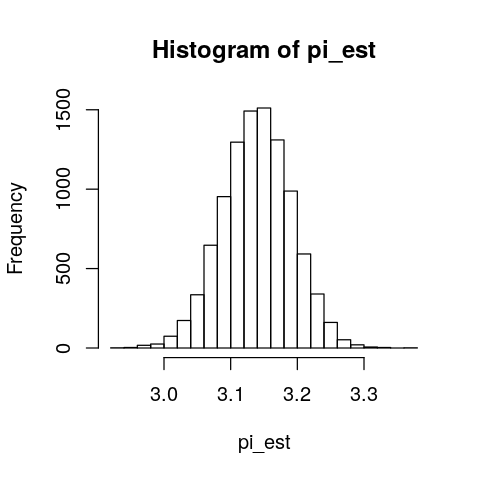

In [45]:
hist(pi_est,breaks=20)

In [46]:
mean(pi_est)
median(pi_est)
sd(pi_est)

[1] 3.141233

[1] 3.14

[1] 0.05183556

We see that the spread of the estimates are smaller with a larger sample size. To see this better, let's increase the sample size systematically and plot the standard deviation versus sample size.

In [47]:
nsample_vec <- seq(100,10000,100)
nexperiments <- 1000
sdvals <- c()
for (nsample in nsample_vec){
    pi_est <- c()
    for (i in 1:nexperiments){
        x <- runif(nsample,-1,1)
        y <- runif(nsample,-1,1)
        pi_est <- c(pi_est, 4*sum(x^2 + y^2 < 1)/nsample)
    }
    sdvals <- c(sdvals, sd(pi_est))
}

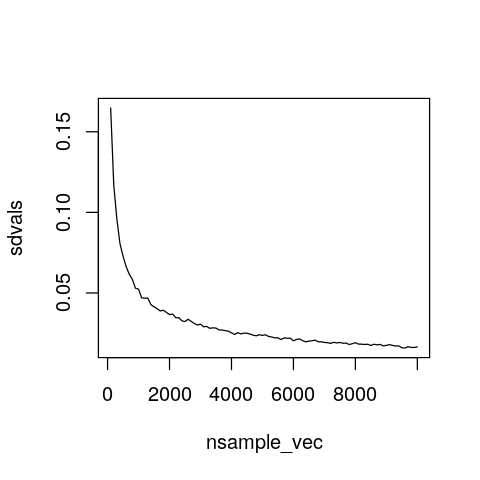

In [48]:
plot(nsample_vec, sdvals, type="l")

Random walk
----

A simple random walk in one dimension is a random process: The walker takes a step to the right or left with equal probability. Let's plot the position of the walker in time.

In [49]:
steps <- sample(c(-1,1), size=10, replace=TRUE)
steps

 [1] -1 -1  1  1 -1 -1 -1 -1 -1  1

The total displacement with respect to the starting point can be found just by applying `sum()`.

In [50]:
sum(steps)

[1] -4

How about the displacement at every step? For example, in the first four steps, this can be done as follows:

In [51]:
c( sum(steps[1]), sum(steps[1:2]), sum(steps[1:3]), sum(steps[1:4]) )

[1] -1 -2 -1  0

There is an R function `cumsum()` that performs this automatically:

In [52]:
cumsum(steps)

 [1] -1 -2 -1  0 -1 -2 -3 -4 -5 -4

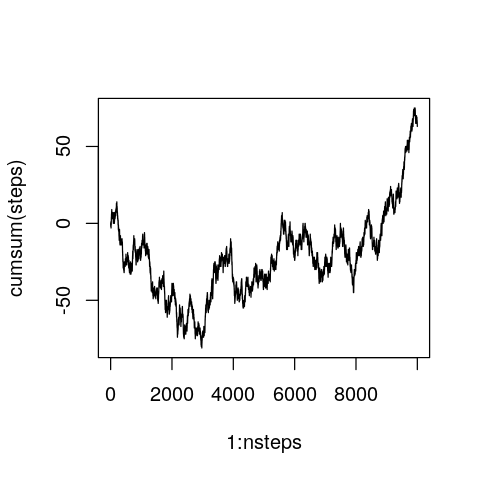

In [53]:
nsteps <- 10000
steps <- sample(c(-1,1), size=nsteps, replace=TRUE)
plot(1:nsteps, cumsum(steps), type="l")